In [98]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import os
import joblib


In [99]:
#Loading the dynamic pricing dataset
df = pd.read_csv(r"C:\Users\NAGARAJ D\Downloads\DataScience\practice\DYNAMICFARE\src\raw\dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


##Exploratory Data Analysis

In [100]:

df.shape

(1000, 10)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [102]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [103]:
#Checking for null values
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

##Data Preprocessing

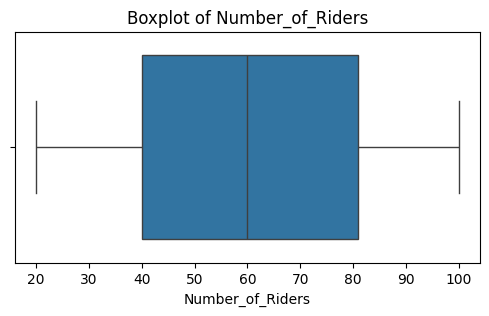

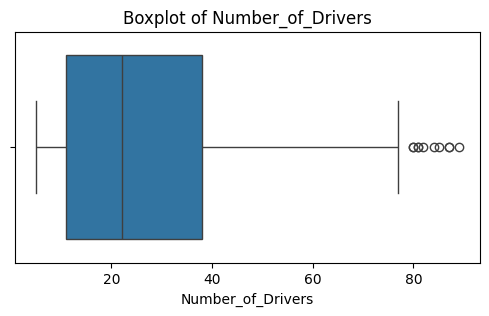

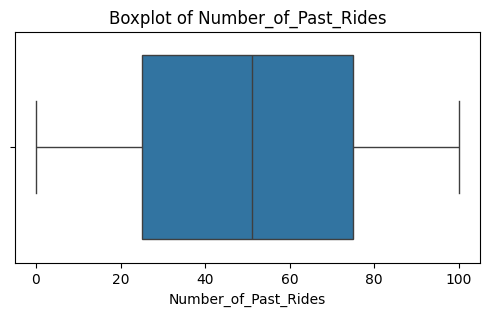

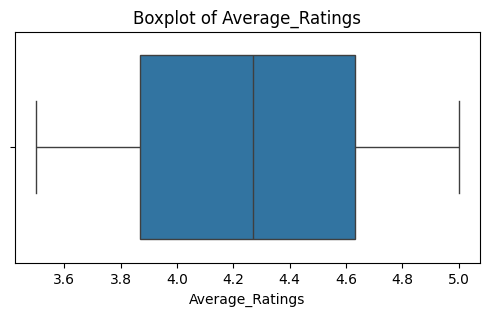

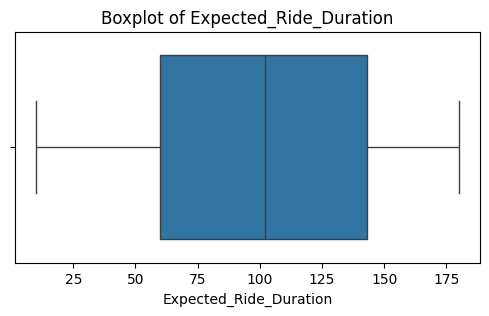

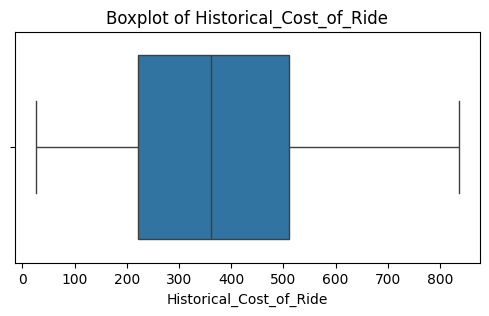

In [104]:
#Checking outlier
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [105]:
#Checking Data Imbalance 
df['Location_Category'].value_counts()


Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

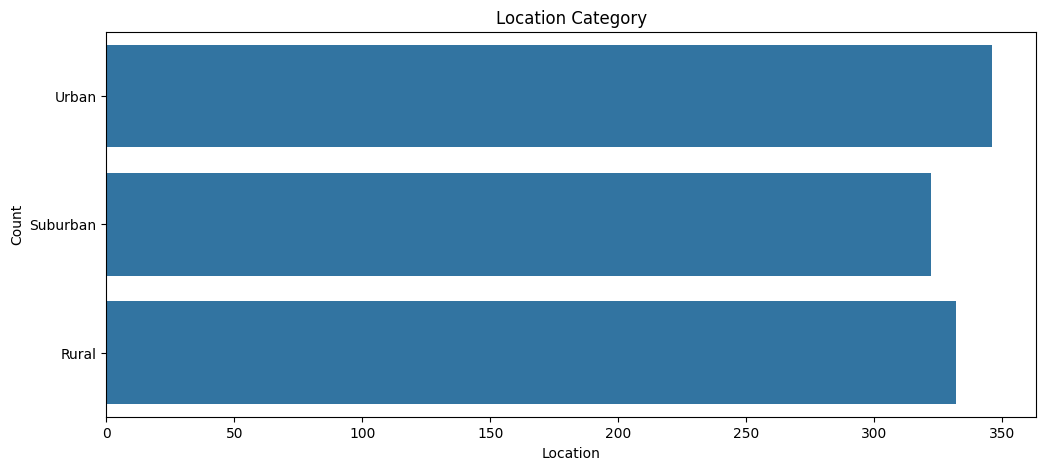

In [106]:
plt.figure(figsize=(12,5))
sns.countplot(df['Location_Category'])
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Category')
plt.show()

In [107]:
df['Customer_Loyalty_Status'].value_counts()

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

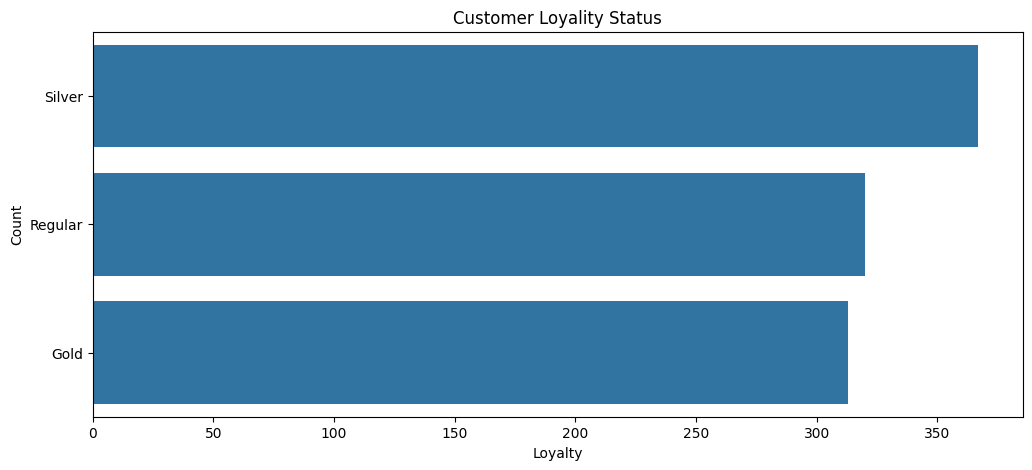

In [108]:
plt.figure(figsize=(12,5))
sns.countplot(df['Customer_Loyalty_Status'])
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.title('Customer Loyality Status')
plt.show()

##Feature Engineering

In [109]:
le = LabelEncoder()
df['Location_Category'] = le.fit_transform(df['Location_Category'])
df['Customer_Loyalty_Status'] = le.fit_transform(df['Customer_Loyalty_Status'])
df['Time_of_Booking'] = le.fit_transform(df['Time_of_Booking'])
df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])

In [110]:
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,2,0,24,4.21,2,1,11,91.389526
996,84,29,2,1,92,4.55,2,1,94,424.155987
997,44,6,1,0,80,4.13,3,1,40,157.364830
998,53,27,1,1,78,3.63,3,1,58,279.095048


In [111]:
#Checking multicollinearity
df.corr()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.050596,0.002304,0.029265,0.008572,0.026725,-0.002635,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.064874,-0.012505,0.039660,0.041204,-0.011344,0.014845,-0.024418,0.017082
Location_Category,0.050596,0.064874,1.000000,0.018074,0.046330,0.009200,0.040890,-0.017770,-0.035920,-0.035874
Customer_Loyalty_Status,0.002304,-0.012505,0.018074,1.000000,0.035519,0.067968,-0.007217,-0.005323,-0.038945,-0.030553
Number_of_Past_Rides,0.029265,0.039660,0.046330,0.035519,1.000000,-0.064734,0.064281,-0.005615,0.030679,0.035859
Average_Ratings,0.008572,0.041204,0.009200,0.067968,-0.064734,1.000000,-0.033306,-0.002523,-0.016968,-0.001063
Time_of_Booking,0.026725,-0.011344,0.040890,-0.007217,0.064281,-0.033306,1.000000,-0.011657,-0.012454,-0.017479
Vehicle_Type,-0.002635,0.014845,-0.017770,-0.005323,-0.005615,-0.002523,-0.011657,1.000000,0.012224,0.132640
Expected_Ride_Duration,-0.015856,-0.024418,-0.035920,-0.038945,0.030679,-0.016968,-0.012454,0.012224,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,-0.035874,-0.030553,0.035859,-0.001063,-0.017479,0.132640,0.927547,1.000000


In [112]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [113]:
#Creating Depedent and Independent Variable
X=df.drop(columns=['Historical_Cost_of_Ride'])
y=df.Historical_Cost_of_Ride

In [114]:
#Splitting data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [115]:
#Model folder creation if not exit
os.makedirs("model", exist_ok=True)

In [116]:
#Model Training
ln=LinearRegression()
ln.fit(X_train,y_train)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

In [118]:
gr=GridSearchCV(GradientBoostingRegressor(), param_grid=params, cv=5, scoring='neg_mean_squared_error')
gr.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [119]:
#Saving the model
joblib.dump(ln, 'model/linear_regression_model.pkl')
joblib.dump(rfr, 'model/random_forest_regressor_model.pkl')
joblib.dump(gr, 'model/gradient_boosting_model.pkl')

['model/gradient_boosting_model.pkl']

In [120]:
#Model Prediction
y_pred=ln.predict(X_test)
y_pred_random=rfr.predict(X_test)
y_pred_gradient=gr.predict(X_test)

In [121]:
#Model Evaluation Metrics
print(f"Linear Regression")
print(f"MAE:{mean_absolute_error(y_test,y_pred):.2f},RMSE:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f},R2_SCORE:{r2_score(y_test,y_pred):.2f}")
print(f"Random Forest Regression")
print(f"MAE:{mean_absolute_error(y_test,y_pred_random):.2f},RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_random)):.2f},R2_SCORE:{r2_score(y_test,y_pred_random):.2f}")
print(f"Gradient Boosting Regression")
print(f"MAE:{mean_absolute_error(y_test,y_pred_gradient):.2f},RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_gradient)):.2f},R2_SCORE:{r2_score(y_test,y_pred_gradient):.2f}")



Linear Regression
MAE:54.06,RMSE:69.03,R2_SCORE:0.86
Random Forest Regression
MAE:56.62,RMSE:75.37,R2_SCORE:0.84
Gradient Boosting Regression
MAE:55.53,RMSE:73.98,R2_SCORE:0.84


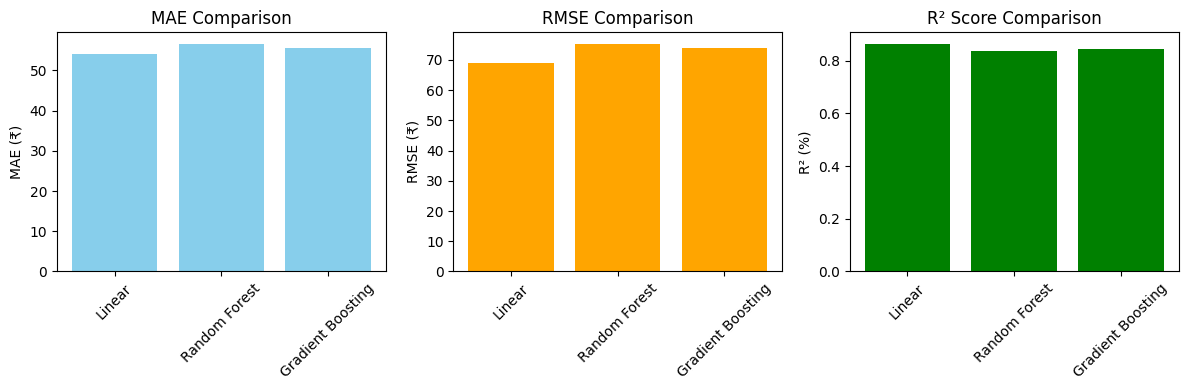

In [122]:
models = ['Linear', 'Random Forest', 'Gradient Boosting']
mae_scores = [mean_absolute_error(y_test,y_pred), mean_absolute_error(y_test,y_pred_random), mean_absolute_error(y_test,y_pred_gradient)]
rmse_scores = [np.sqrt(mean_squared_error(y_test,y_pred)), np.sqrt(mean_squared_error(y_test,y_pred_random)), np.sqrt(mean_squared_error(y_test,y_pred_gradient))]
r2_scores = [r2_score(y_test,y_pred), r2_score(y_test,y_pred_random), r2_score(y_test,y_pred_gradient)]

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.title('MAE Comparison')
plt.ylabel('MAE (₹)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(models, rmse_scores, color='orange')
plt.title('RMSE Comparison')
plt.ylabel('RMSE (₹)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='green')
plt.title('R² Score Comparison')
plt.ylabel('R² (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
